<a href="https://colab.research.google.com/github/euisseung/-data-EDA/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python --version

Python 3.12.12


#(1)

#(a)

In [ ]:
import numpy as np
import torch
from torchvision import transforms , datasets
trainset = datasets . CIFAR10 ( root ='./ data ', train =True ,
download =True ,
transform = transforms . ToTensor () )
testset = datasets . CIFAR10 ( root ='./ data ', train =False ,
download =True ,
transform = transforms . ToTensor () )


100%|██████████| 170M/170M [00:05<00:00, 29.5MB/s]


#(b)

In [ ]:
print(trainset.classes)
print(len(trainset.classes))

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
10


label: 6


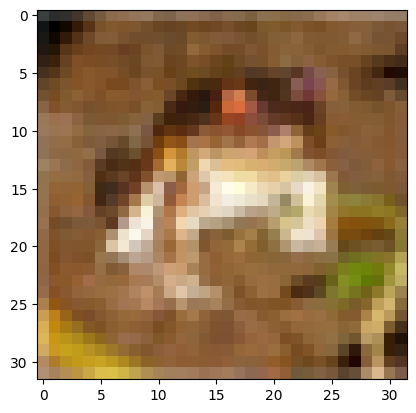

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(trainset[0][0].permute(1,2,0))
print(f'label: {trainset[0][1]}')

label: 9


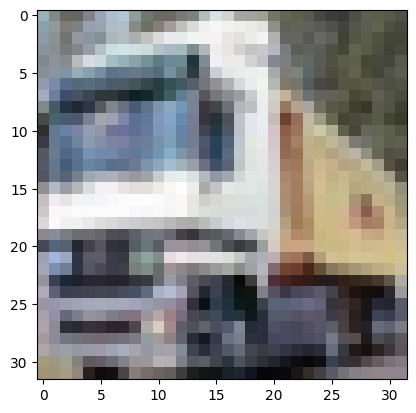

In [ ]:
plt.imshow(trainset[1][0].permute(1,2,0))
print(f'label: {trainset[1][1]}')

label: 4


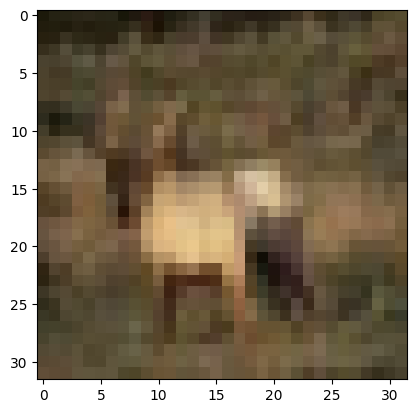

In [ ]:
plt.imshow(trainset[3][0].permute(1,2,0))
print(f'label: {trainset[3][1]}')

label: 1


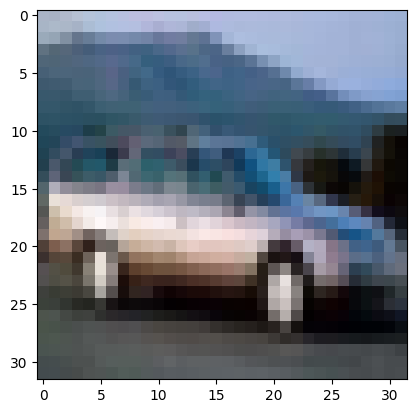

In [ ]:
plt.imshow(trainset[4][0].permute(1,2,0))
print(f'label: {trainset[4][1]}')

label: 2


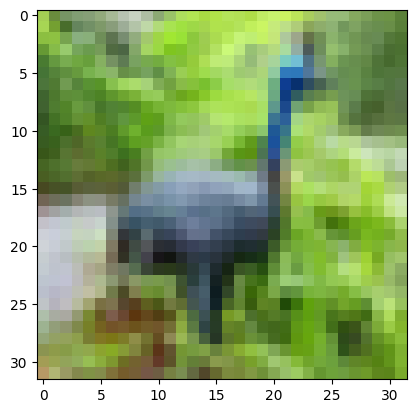

In [ ]:
plt.imshow(trainset[6][0].permute(1,2,0))
print(f'label: {trainset[6][1]}')

label: 7


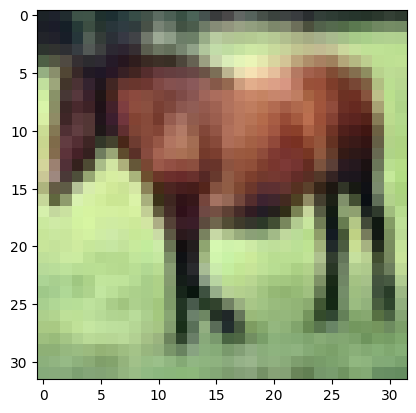

In [ ]:
plt.imshow(trainset[7][0].permute(1,2,0))
print(f'label: {trainset[7][1]}')

label: 8


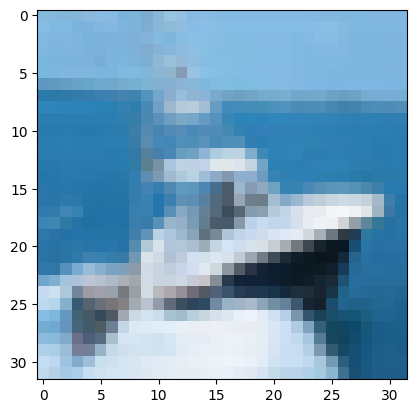

In [ ]:
plt.imshow(trainset[8][0].permute(1,2,0))
print(f'label: {trainset[8][1]}')

label: 3


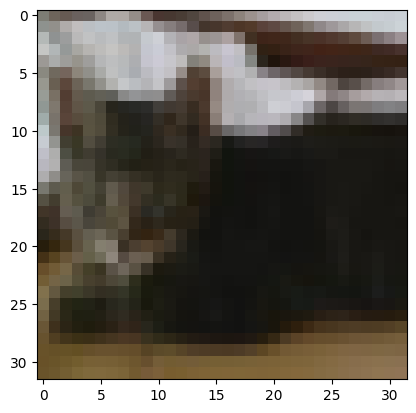

In [ ]:
plt.imshow(trainset[9][0].permute(1,2,0))
print(f'label: {trainset[9][1]}')

label: 5


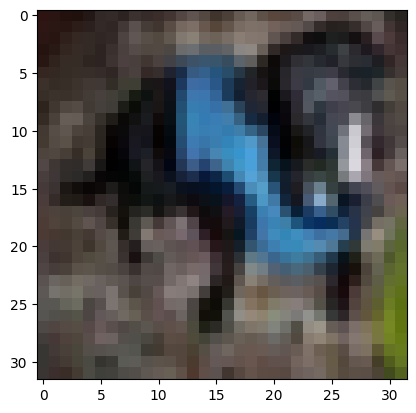

In [ ]:
plt.imshow(trainset[27][0].permute(1,2,0))
print(f'label: {trainset[27][1]}')

label: 0


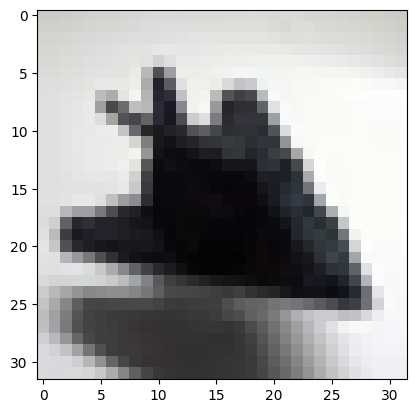

In [ ]:
plt.imshow(trainset[29][0].permute(1,2,0))
print(f'label: {trainset[29][1]}')

#(C)

In [ ]:
torch.manual_seed(2025)

In [ ]:
val_ratio = 0.1

In [ ]:
train_size = len(trainset)

In [ ]:
indices = list(range(train_size))

In [ ]:
split_idx = int(val_ratio * train_size)
print(split_idx)

5000


In [ ]:
train_idx, val_idx = indices[split_idx:], indices[:split_idx]

In [ ]:
train_data = trainset.data[train_idx]
val_data = trainset.data[val_idx]

In [ ]:
print(len(train_data), len(val_data))

45000 5000


In [ ]:
print(len(train_data[0]))
print(train_data[0].shape)

32
(32, 32, 3)


In [ ]:
from torch.utils.data import DataLoader
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64, shuffle=True)

#(D)

choose class 3(cat) and class 8(ship)



In [ ]:
t_indices_3 = [i for i in train_idx if trainset[i][1] in [3]]

In [ ]:
print(len(t_indices_3))

4514


In [ ]:
t_indices_8 = [i for i in train_idx if trainset[i][1] in [8]]

In [ ]:
print(len(t_indices_8))

4480


In [ ]:
t_indices = list(set(t_indices_3) & set(t_indices_8))

In [ ]:
split_3 = int(val_ratio * len(t_indices_3))
split_8 = int(val_ratio * len(t_indices_8))
print(split_3, split_8)

451 448


In [ ]:
train_idx = t_indices_3[split_3:] + t_indices_8[split_8:]
val_idx = t_indices_3[:split_3] + t_indices_8[:split_8]
print(len(train_idx), len(val_idx))

8095 899


In [ ]:
from torch.utils.data import Subset
train_subset = Subset(trainset, train_idx)

In [ ]:
val_subset = Subset(trainset, val_idx)

In [ ]:
from torch.utils.data import Dataset
class Mapping(Dataset):
  def __init__(self, subset, mapping={3: 1, 8: -1}):
    self.subset = subset
    self.mapping = mapping

  def __len__(self):
    return len(self.subset)

  def __getitem__(self, idx):
    x, y = self.subset[idx]
    y = self.mapping[y]
    return x, y

In [ ]:
n_train_subset = Mapping(train_subset)
n_val_subset = Mapping(val_subset)

In [ ]:
print(n_train_subset[0][1])

1


In [ ]:
print(n_train_subset[-1][1])

-1


In [ ]:
for num, i in enumerate(n_train_subset):
  if i[1] == 1:
    print(i[0][1], num)
    break
for num, i in enumerate(n_train_subset):
  if i[1] == -1:
    print(i[0][1], num)
    break
#Is there a need to mix the order randomly?

tensor([[0.2667, 0.2980, 0.6706,  ..., 0.6039, 0.5686, 0.4784],
        [0.1686, 0.3216, 0.7490,  ..., 0.6000, 0.6549, 0.3882],
        [0.3804, 0.7490, 0.8353,  ..., 0.6627, 0.6588, 0.4549],
        ...,
        [0.3176, 0.4510, 0.4980,  ..., 0.3333, 0.3490, 0.3569],
        [0.2667, 0.4392, 0.4667,  ..., 0.2745, 0.2745, 0.3255],
        [0.1412, 0.3647, 0.4549,  ..., 0.2667, 0.2667, 0.2863]]) 0
tensor([[0.3647, 0.4118, 0.4627,  ..., 0.9176, 0.9373, 0.9451],
        [0.4471, 0.4745, 0.5333,  ..., 0.9020, 0.9490, 0.9490],
        [0.5490, 0.5294, 0.6157,  ..., 0.9098, 0.9333, 0.9373],
        ...,
        [0.4157, 0.4314, 0.4353,  ..., 0.3451, 0.6118, 0.8157],
        [0.3961, 0.4039, 0.4078,  ..., 0.4353, 0.7412, 0.8314],
        [0.3765, 0.3765, 0.3765,  ..., 0.5529, 0.8000, 0.8196]]) 4063


In [ ]:
train_loader = DataLoader(n_train_subset, batch_size=64, shuffle=True)
val_loader = DataLoader(n_val_subset, batch_size=64, shuffle=False)

In [ ]:
for data, label in train_loader:
  print(f"data dim: {data.shape}")
  print(data)
  print(label)
  print(len(label))
  break

data dim: torch.Size([64, 3, 32, 32])
tensor([[[[0.8824, 0.8941, 0.9059,  ..., 0.7451, 0.7294, 0.7373],
          [0.8824, 0.8863, 0.8941,  ..., 0.7412, 0.7216, 0.7294],
          [0.8667, 0.8706, 0.8784,  ..., 0.7451, 0.7216, 0.7294],
          ...,
          [0.2471, 0.2745, 0.2824,  ..., 0.1765, 0.1882, 0.1765],
          [0.2941, 0.3294, 0.3373,  ..., 0.2314, 0.2196, 0.2196],
          [0.3098, 0.3137, 0.3490,  ..., 0.2039, 0.1882, 0.2000]],

         [[0.8549, 0.8667, 0.8784,  ..., 0.7451, 0.7412, 0.7490],
          [0.8549, 0.8588, 0.8667,  ..., 0.7451, 0.7333, 0.7412],
          [0.8471, 0.8510, 0.8588,  ..., 0.7451, 0.7333, 0.7412],
          ...,
          [0.4627, 0.4941, 0.4980,  ..., 0.3686, 0.3725, 0.3490],
          [0.4980, 0.5333, 0.5412,  ..., 0.4235, 0.4157, 0.3922],
          [0.5137, 0.5176, 0.5529,  ..., 0.3961, 0.3843, 0.3686]],

         [[0.8314, 0.8431, 0.8549,  ..., 0.7765, 0.7686, 0.7765],
          [0.8314, 0.8392, 0.8471,  ..., 0.7765, 0.7608, 0.7686],
    

In [ ]:
def hinge_loss(p, t):
  loss = torch.clamp(1-(p * t), min=0)
  return torch.mean(loss)

In [ ]:
# from torch import nn
# class SVM(nn.Module):
#   def __init__(self, input_dim, output_dim, hidden_dim):
#     super(SVM, self).__init__()
#     self.flatten = nn.Flatten()
#     self.layer_one = nn.Linear(input_dim, hidden_dim)
#     self.layer_two = nn.Linear(hidden_dim, output_dim)
#     self.relu = nn.ReLU()
#   def forward(self, x):
#     x = self.flatten(x)
#     x = self.layer_one(x)
#     x = self.relu(x)
#     x = self.layer_two(x)
#     return x.flatten()

In [ ]:
from torch import nn
class SVM(nn.Module):
  def __init__(self, dim):
    super(SVM, self).__init__()
    self.flatten = nn.Flatten()
    self.Linear = nn.Linear(dim, 1)

  def forward(self, x):
    x = self.flatten(x)
    x = self.Linear(x)
    return x.flatten()

In [ ]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
def train(model, train_loader, optimizer, loss_func):
  model.train()
  train_loss = 0.0
  for i, data in enumerate(train_loader, 0): #starting index 0
    inputs, labels = data
    labels = labels.float()
    inputs, labels = inputs.to(device), labels.to(device) #to gpu accelerate
    optimizer.zero_grad() #gradient -> 0(not accumulate)
    outputs = model(inputs.float())
    loss = loss_func(outputs, labels)
    loss.backward()
    optimizer.step()
    train_loss += loss.item()
  return train_loss / len(train_loader)

In [ ]:
def val(model, val_loader, loss_func):
  val_loss = 0.0
  total, correct = 0.0, 0.0
  for i, val_data in enumerate(val_loader, 0):
    val_inputs, val_labels = val_data
    val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)
    val_outputs = model(val_inputs.float())
    pred_val = torch.sign(val_outputs)
    val_loss_value = loss_func(val_outputs, val_labels)
    val_loss += val_loss_value

  return val_loss / len(val_loader)

In [ ]:
def test(model, test_loader):
  model.eval()
  correct = 0
  whole_data = 0
  with torch.no_grad():
    for data in test_loader:
      inputs, labels = data
      inputs = inputs.to(device)
      labels = labels.to(device)
      outputs = model(inputs.float())
      pred = torch.sign(outputs)
      correct += (pred == labels).sum().item()
      whole_data += len(labels)
  return correct / whole_data

In [ ]:
import torch.optim as optim
dim = 3 * 32 * 32
model = SVM(dim)
model.to(device)
loss_func = hinge_loss
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay = 0.01)

#(e)

In [ ]:
for i in range(10):
  train_loss = train(model, train_loader, optimizer, loss_func)
  print(f'{i + 1}th train loss: {train_loss}')
  val_loss = val(model, val_loader, loss_func)
  print(f'{i + 1}th val loss: {val_loss}')

1th train loss: 0.4669708703446576
1th val loss: 0.4051074981689453
2th train loss: 0.385431818370744
2th val loss: 0.3766903877258301
3th train loss: 0.38268050046886987
3th val loss: 0.3800441324710846
4th train loss: 0.3694511974655737
4th val loss: 0.3767584562301636
5th train loss: 0.3691223077182695
5th val loss: 0.37401923537254333
6th train loss: 0.3865947353792942
6th val loss: 0.37952378392219543
7th train loss: 0.3593524084316464
7th val loss: 0.383544921875
8th train loss: 0.36989058765370075
8th val loss: 0.4249225854873657
9th train loss: 0.36263854132862544
9th val loss: 0.37384769320487976
10th train loss: 0.3616894254768927
10th val loss: 0.4312939941883087


#(f)

In [ ]:
data, labels = next(iter(train_loader))
print(data.shape)
print(labels.shape)

torch.Size([64, 3, 32, 32])
torch.Size([64])


In [ ]:
data_sum = 0.0
data_sqsum = 0.0
batch_count = 0
for data, _ in train_loader:
  curr_mean = data.mean(dim=[0, 2, 3], keepdim=True)
  data_sum += data.mean(dim=[0, 2, 3])
  data_sqsum += (data**2).mean(dim=[0, 2, 3])
  batch_count += 1
  print(curr_mean, data_sum, batch_count)


tensor([[[[0.4921]],

         [[0.4898]],

         [[0.4760]]]]) tensor([0.4921, 0.4898, 0.4760]) 1
tensor([[[[0.4760]],

         [[0.4696]],

         [[0.4523]]]]) tensor([0.9681, 0.9594, 0.9284]) 2
tensor([[[[0.4845]],

         [[0.4884]],

         [[0.4955]]]]) tensor([1.4526, 1.4478, 1.4239]) 3
tensor([[[[0.4790]],

         [[0.4771]],

         [[0.4690]]]]) tensor([1.9316, 1.9249, 1.8929]) 4
tensor([[[[0.5075]],

         [[0.5101]],

         [[0.5027]]]]) tensor([2.4391, 2.4349, 2.3956]) 5
tensor([[[[0.5095]],

         [[0.5146]],

         [[0.5120]]]]) tensor([2.9486, 2.9496, 2.9076]) 6
tensor([[[[0.4874]],

         [[0.4927]],

         [[0.4946]]]]) tensor([3.4360, 3.4422, 3.4022]) 7
tensor([[[[0.4694]],

         [[0.4688]],

         [[0.4542]]]]) tensor([3.9054, 3.9110, 3.8564]) 8
tensor([[[[0.4879]],

         [[0.4823]],

         [[0.4714]]]]) tensor([4.3934, 4.3933, 4.3278]) 9
tensor([[[[0.4844]],

         [[0.4940]],

         [[0.5039]]]]) tensor([4.8777,

In [ ]:
final_mean = data_sum / batch_count
print(final_mean)

tensor([0.4923, 0.4906, 0.4849])


In [ ]:
final_val = (data_sqsum / batch_count) - (final_mean**2)
print(final_val)

tensor([0.0643, 0.0620, 0.0697])


In [ ]:
final_std = torch.sqrt(final_val)
print(final_std)

tensor([0.2535, 0.2489, 0.2641])


In [ ]:
final_mean = final_mean.tolist()
final_val = final_val.tolist()
print(final_mean, final_val)

[0.49225544929504395, 0.4906437397003174, 0.48488470911979675] [0.06428186595439911, 0.06196342408657074, 0.06973952054977417]


In [ ]:
import torchvision.transforms as transforms
norm_train = transforms.Normalize(final_mean, final_std)

In [ ]:
final_transform = transforms.Compose([
    transforms.ToTensor(),
    norm_train]
)

In [ ]:
n_train_subset.transform = final_transform
n_val_subset.transform = final_transform

In [ ]:
normal_train_loader = DataLoader(n_train_subset, batch_size=64, shuffle=True)
normal_val_loader = DataLoader(n_val_subset, batch_size=64, shuffle=False)

In [ ]:
for i in range(10):
  train_loss = train(model, normal_train_loader, optimizer, loss_func)
  print(f'{i + 1}th train loss: {train_loss}')
  val_loss = val(model, normal_val_loader, loss_func)
  print(f'{i + 1}th val loss: {val_loss}')

1th train loss: 0.35276142607523703
1th val loss: 0.3677872121334076
2th train loss: 0.34792750534110184
2th val loss: 0.36866670846939087
3th train loss: 0.3547345540654941
3th val loss: 0.36523449420928955
4th train loss: 0.3624862664797175
4th val loss: 0.36559101939201355
5th train loss: 0.34511968399596027
5th val loss: 0.37192416191101074
6th train loss: 0.3431422828923999
6th val loss: 0.40294015407562256
7th train loss: 0.3533669799331605
7th val loss: 0.3982539772987366
8th train loss: 0.34967152035142496
8th val loss: 0.38153791427612305
9th train loss: 0.3579346707721395
9th val loss: 0.364260733127594
10th train loss: 0.345088329019509
10th val loss: 0.3927845060825348


#(h) hyperparameter tune
tunable: learning rate, weight_decay

In [ ]:
#exiting hyperparameter
#optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay = 0.01)

In [ ]:
!pip show optuna

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 13.3 MB/s eta 0:00:00


In [ ]:
import optuna
import torch.optim as optim

In [ ]:
def objective(trial):
  lr = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
  weight_decay = trial.suggest_loguniform('weight_decay', 1e-5, 1e-1)
  model = SVM(dim)
  model.to(device)
  optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
  loss_func = hinge_loss
  for i in range(10):
    train_loss = train(model, normal_train_loader, optimizer, loss_func)
  val_loss = val(model, normal_val_loader, loss_func)
  return val_loss


In [ ]:
tunning = optuna.create_study(direction='minimize')
tunning.optimize(objective, n_trials=50)
print(f"best hyperparameter: {tunning.best_params}")
print(f"best value: {tunning.best_value}")

[I 2025-10-29 00:09:56,831] A new study created in memory with name: no-name-b7af96ae-42c0-4061-812b-34e11483f8d4
/tmp/ipython-input-3330688664.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
/tmp/ipython-input-3330688664.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('weight_decay', 1e-5, 1e-1)
[W 2025-10-29 00:09:57,678] Trial 0 failed with parameters: {'learning_rate': 3.113207755789719e-05, 'weight_decay': 0.0009137512338159447} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packag

KeyboardInterrupt: 

In [ ]:
test_indices = [i for i in range(len(testset)) if testset[i][1] in [3, 8]]
n_test_set = Subset(testset, test_indices)
print(n_test_set[0][1])
print(n_test_set[2][1])

3
8


In [ ]:
print(len(n_test_set))
print(len(testset))

2000
10000


In [ ]:
n_test_set = Mapping(n_test_set)
print(n_test_set[0][1])

1


In [ ]:
n_test_set.transform = final_transform

In [ ]:
test_loader = DataLoader(n_test_set, batch_size=64, shuffle=False)

In [ ]:
dim = 3 * 32 * 32
model = SVM(dim)
model.to(device)
loss_func = hinge_loss
optimizer = optim.Adam(model.parameters(), lr=0.003, weight_decay = 0.00036)
for i in range(10):
  train_loss = train(model, normal_train_loader, optimizer, loss_func)
  print(f'{i + 1}th train loss: {train_loss}')
val_loss = val(model, normal_val_loader, loss_func)
print(f'val accuracy: {val_loss}')

1th train loss: 0.4631204092361796
2th train loss: 0.40810126652867773
3th train loss: 0.40958180354805446
4th train loss: 0.39059388531943945
5th train loss: 0.36566096239202606
6th train loss: 0.39176569879055023
7th train loss: 0.38564094830685713
8th train loss: 0.36059704223486383
9th train loss: 0.36808980320851636
10th train loss: 0.38824546348860883
val accuracy: 0.3831310272216797


In [ ]:
val_loss = val(model, normal_val_loader, loss_func)
print(f'val accuracy: {val_loss}')

val accuracy: 0.3831310272216797


In [ ]:
final_accuracy = test(model, test_loader)
print(f'final accuracy: {final_accuracy}')

final accuracy: 0.8555


#(2)

#(a)
#class zero

In [ ]:
train_idx = {i: [] for i in range(10)}
val_idx = {i: [] for i in range(10)}
test_idx = {i: [] for i in range(10)}

for i in range(len(trainset)):
  label = trainset[i][1]
  train_idx[label].append(i)

for i in range(len(testset)):
  label = testset[i][1]
  test_idx[label].append(i)

for i in range(10):
  print(len(train_idx[i]), len(test_idx[i]))

5000 1000
5000 1000
5000 1000
5000 1000
5000 1000
5000 1000
5000 1000
5000 1000
5000 1000
5000 1000


In [ ]:
import random

for i in range(10):
    random.shuffle(train_idx[i])
    val_idx[i] = train_idx[i][:500]
    train_idx[i] = train_idx[i][500:]

In [ ]:
for i in range(10):
  print(len(train_idx[i]), len(test_idx[i]), len(val_idx[i]))

4500 1000 500
4500 1000 500
4500 1000 500
4500 1000 500
4500 1000 500
4500 1000 500
4500 1000 500
4500 1000 500
4500 1000 500
4500 1000 500


In [ ]:
# class 0  vs all
train_class_0 = Subset(trainset, train_idx[0])
remain_class = []
for i in range(1, 10):
  remain_class.extend(train_idx[i])
remain = Subset(trainset, remain_class)

In [ ]:
val_class_0 = Subset(trainset, val_idx[0])
val_remain_class = []
for i in range(1, 10):
  val_remain_class.extend(val_idx[i])
val_remain = Subset(trainset, val_remain_class)

In [ ]:
from torch.utils.data import Dataset
class Mapping_specific(Dataset):
  def __init__(self, subset, target_class_num):
    self.subset = subset
    self.mapping = {i: 1 if i == target_class_num else -1 for i in range(10)}

  def __len__(self):
    return len(self.subset)

  def __getitem__(self, idx):
    x, y = self.subset[idx]
    y = self.mapping[y]
    return x, y

In [ ]:
train_class_0 = Mapping_specific(train_class_0, 0)
remain = Mapping_specific(remain, 0)
val_class_0 = Mapping_specific(val_class_0, 0)
val_remain = Mapping_specific(val_remain, 0)

In [ ]:
from torch.utils.data import ConcatDataset
train_dataset = ConcatDataset([train_class_0, remain])

In [ ]:
valid_dataset = ConcatDataset([val_class_0, val_remain])

In [ ]:
zero_train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
zero_val_loader = DataLoader(valid_dataset, batch_size=64, shuffle=False)

In [ ]:
dim = 3 * 32 * 32
model = SVM(dim)
model.to(device)
loss_func = hinge_loss
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay = 0.0001)
for i in range(10):
  train_loss = train(model, zero_train_loader, optimizer, loss_func)
  print(f'{i + 1}th train loss: {train_loss}')
val_loss = val(model, zero_val_loader, loss_func)
print(f'val accuracy: {val_loss}')

1th train loss: 0.26688909193961247
2th train loss: 0.255121626150371
3th train loss: 0.24618480119732505
4th train loss: 0.24457928160501813
5th train loss: 0.23811424779176543
6th train loss: 0.23151839009369723
7th train loss: 0.23395136882027145
8th train loss: 0.23649893844743597
9th train loss: 0.2325742864790796
10th train loss: 0.22997026752405378
val accuracy: 0.21315889060497284


In [ ]:
def objective(trial):
  lr = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
  weight_decay = trial.suggest_loguniform('weight_decay', 1e-5, 1e-1)
  model = SVM(dim)
  model.to(device)
  optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
  loss_func = hinge_loss
  for i in range(10):
    train_loss = train(model, zero_train_loader, optimizer, loss_func)
  val_loss = val(model, zero_val_loader, loss_func)
  return val_loss


In [ ]:
tunning = optuna.create_study(direction='minimize')
tunning.optimize(objective, n_trials=50)
print(f"best hyperparameter: {tunning.best_params}")
print(f"best value: {tunning.best_value}")

[I 2025-10-29 00:15:39,551] A new study created in memory with name: no-name-89295484-3ce6-4656-bb6c-df58cc24e3c5
/tmp/ipython-input-3330688664.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
/tmp/ipython-input-3330688664.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('weight_decay', 1e-5, 1e-1)
/usr/local/lib/python3.12/dist-packages/optuna/study/_tell.py:66: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /pytorch/torch/csrc/autograd/generated/pyt

best hyperparameter: {'learning_rate': 0.0014806486771574733, 'weight_decay': 0.008687857113367623}
best value: 0.36511704325675964


In [ ]:
dim = 3 * 32 * 32
model = SVM(dim)
model.to(device)
loss_func = hinge_loss
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay = 0.0086)
for i in range(10):
  train_loss = train(model, zero_train_loader, optimizer, loss_func)
  print(f'{i + 1}th train loss: {train_loss}')
val_loss = val(model, zero_val_loader, loss_func)
print(f'val accuracy: {val_loss}')

1th train loss: 0.26323175857859576
2th train loss: 0.24890129393051294
3th train loss: 0.24403524113586172
4th train loss: 0.24166552669934885
5th train loss: 0.23862565286055376
6th train loss: 0.23545323229204354
7th train loss: 0.2358964395746377
8th train loss: 0.2368621167896146
9th train loss: 0.22905042085701346
10th train loss: 0.22871704369952733
val accuracy: 0.21873001754283905


In [ ]:
zero_testset = Mapping_specific(testset, 0)

In [ ]:
zero_test_loader = DataLoader(zero_testset, batch_size=64, shuffle=False)

In [ ]:
final_accuracy = test(model, zero_test_loader)
print(f'final accuracy: {final_accuracy}')

final accuracy: 0.9012


#class one

In [ ]:
# class 1  vs all
train_class_1 = Subset(trainset, train_idx[1])
remain_class = []
for i in range(2, 10):
  remain_class.extend(train_idx[i])
remain_class.extend(train_idx[0])
remain = Subset(trainset, remain_class)


In [ ]:
val_class_1 = Subset(trainset, val_idx[1])
val_remain_class = []
for i in range(2, 10):
  val_remain_class.extend(val_idx[i])
val_remain_class.extend(val_idx[0])
val_remain = Subset(trainset, val_remain_class)

In [ ]:
train_class_1 = Mapping_specific(train_class_1, 1)
remain = Mapping_specific(remain, 1)
val_remain = Mapping_specific(val_remain, 1)
val_class_1 = Mapping_specific(val_class_1, 1)

In [ ]:
train_dataset_one = ConcatDataset([train_class_1, remain])
valid_dataset_one = ConcatDataset([val_class_1, val_remain])

In [ ]:
one_train_loader = DataLoader(train_dataset_one, batch_size=64, shuffle=True)
one_valid_loader = DataLoader(valid_dataset_one, batch_size=64, shuffle=False)

In [ ]:
dim = 3 * 32 * 32
model = SVM(dim)
model.to(device)
loss_func = hinge_loss
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay = 0.0001)
for i in range(10):
  train_loss = train(model, one_train_loader, optimizer, loss_func)
  print(f'{i + 1}th train loss: {train_loss}')
val_loss = val(model, one_valid_loader, loss_func)
print(f'val accuracy: {val_loss}')

1th train loss: 0.24418240601318592
2th train loss: 0.22996198230909862
3th train loss: 0.2272397194650363
4th train loss: 0.23037784751663407
5th train loss: 0.2268184260015418
6th train loss: 0.22577481773756022
7th train loss: 0.22168891731945967
8th train loss: 0.2267330677925863
9th train loss: 0.21680042646105654
10th train loss: 0.22470552652852016
val accuracy: 0.24207597970962524


In [ ]:
def objective_to_one(trial):
  lr = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
  weight_decay = trial.suggest_loguniform('weight_decay', 1e-5, 1e-1)
  model = SVM(dim)
  model.to(device)
  optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
  loss_func = hinge_loss
  for i in range(10):
    train_loss = train(model, one_train_loader, optimizer, loss_func)
  val_loss = val(model, one_valid_loader, loss_func)
  return val_loss


In [ ]:
tunning = optuna.create_study(direction='minimize')
tunning.optimize(objective_to_one, n_trials=50)
print(f"best hyperparameter: {tunning.best_params}")
print(f"best value: {tunning.best_value}")

[I 2025-10-29 01:07:04,841] A new study created in memory with name: no-name-d91a9a9d-555c-4f38-9e65-f1ed143ed85a
/tmp/ipython-input-3366265499.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
/tmp/ipython-input-3366265499.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('weight_decay', 1e-5, 1e-1)
[I 2025-10-29 01:08:11,187] Trial 0 finished with value: 0.21130327880382538 and parameters: {'learning_rate': 0.000978809571124468, 'weight_decay': 0.0010708015888146578}. Best is trial 0 with value: 0.21130327880382538.
[I 2025-10-29 01:09:17,687] Trial 1 finished with v

KeyboardInterrupt: 

In [ ]:
!nvidia-smi

Wed Oct 29 01:16:31 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   78C    P0             33W /   70W |     392MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import torch
print("torch.cuda.is_available():", torch.cuda.is_available())
if torch.cuda.is_available():
    print("current_device:", torch.cuda.current_device())
    print("device name:", torch.cuda.get_device_name(torch.cuda.current_device()))

torch.cuda.is_available(): True
current_device: 0
device name: Tesla T4
